In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np1
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import plotly.express as px
import os

# Data columns

* Field name	Description
* latitude	Center of 1km fire pixel but not necessarily the actual location of the fire as one or more fires can be detected within the 1km pixel.
* longitude	Center of 1km fire pixel but not necessarily the actual location of the fire as one or more fires can be detected within the 1km pixel.
* brightness	Brightness temperature 21 (Kelvin): Channel 21/22 brightness temperature of the fire pixel measured in Kelvin.
* scan	Along Scan pixel size: The algorithm produces 1km fire pixels but MODIS pixels get bigger toward the edge of scan. Scan and track reflect actual pixel size.
* track	Along Track pixel size: The algorithm produces 1km fire pixels but MODIS pixels get bigger toward the edge of scan. Scan and track reflect actual pixel size.
* acq_date	Date of MODIS acquisition.
* acq_time	Acquisition Time: Time of acquisition/overpass of the satellite (in UTC).
* satellite	Satellite: A = Aqua and T = Terra.
* instrument	Instrument: Constant value for MODIS.
* confidence	Confidence (0-100%): This value is based on a collection of intermediate algorithm quantities used in the detection process.
* version	Version: Algorithm version used to process the data.
* bright_t31	Brightness temperature 31 (Kelvin): Channel 31 brightness temperature of the fire pixel measured in Kelvin.
* frp	Fire Radiative Power (FRP) in Megawatts (MW): FRP is the radiant heat power emitted by the fire, as measured by the MODIS sensor.
* daynight	Day/Night: Flag indicating whether the fire was detected during the day (D) or night (N).

**Load data**

In [2]:
df = pd.read_csv("../input/fires-from-space-australia-and-new-zeland/fire_nrt_M6_96619.csv")

**Show first five rows of data**

In [3]:
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   -14.281    143.636       323.9   1.7    1.3  2019-10-01        25   
1   -14.284    143.532       343.5   1.7    1.3  2019-10-01        25   
2   -14.302    143.706       320.2   1.7    1.3  2019-10-01        25   
3   -14.283    143.652       320.4   1.7    1.3  2019-10-01        25   
4   -14.285    143.521       349.4   1.7    1.3  2019-10-01        25   

  satellite instrument  confidence version  bright_t31    frp daynight  
0     Terra      MODIS          70  6.0NRT       302.3   26.8        D  
1     Terra      MODIS          90  6.0NRT       306.3   84.3        D  
2     Terra      MODIS          30  6.0NRT       305.0   14.1        D  
3     Terra      MODIS          57  6.0NRT       303.3   18.4        D  
4     Terra      MODIS          94  6.0NRT       304.7  110.7        D

**Information about data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183593 entries, 0 to 183592
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    183593 non-null  float64
 1   longitude   183593 non-null  float64
 2   brightness  183593 non-null  float64
 3   scan        183593 non-null  float64
 4   track       183593 non-null  float64
 5   acq_date    183593 non-null  object 
 6   acq_time    183593 non-null  int64  
 7   satellite   183593 non-null  object 
 8   instrument  183593 non-null  object 
 9   confidence  183593 non-null  int64  
 10  version     183593 non-null  object 
 11  bright_t31  183593 non-null  float64
 12  frp         183593 non-null  float64
 13  daynight    183593 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 19.6+ MB


In [5]:
min(df['acq_date'])

'2019-10-01'

In [6]:
max(df['acq_date'])

'2020-01-11'

# Seasonal Variation:

Plot: Line plot showing the number of fires over time, grouped by seasons. Seasonal variation could be an indicator of natural factors like dry seasons.
Geographical Distribution:

In [7]:
# assuming 'acq_date' is in datetime format in your DataFrame
# If not, convert it using df['acq_date'] = pd.to_datetime(df['acq_date'])
df['acq_date'] = pd.to_datetime(df['acq_date'])

# create a new column for the season based on the month
df['season'] = df['acq_date'].dt.month.apply(lambda x: (x % 12 + 3) // 3)

# group by season and count the number of fires
seasonal_fires = df.groupby('season').size()

# map season numbers to names
season_names = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
seasonal_fires.index = seasonal_fires.index.map(season_names)


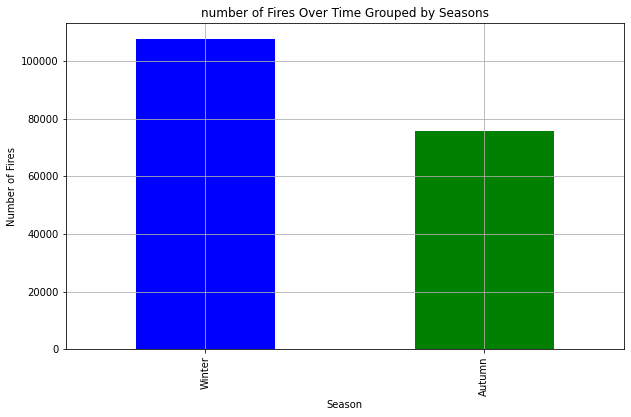

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(seasonal_fires#.index, seasonal_fires, marker='o', kind='bar' , linestyle='-', color='b', markerfacecolor='r')
seasonal_fires.plot(kind='bar', stacked=True, color=['blue', 'green'])        
plt.title('number of Fires Over Time Grouped by Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Fires')
plt.grid(True)
plt.show()


# Result 
Winter and autumn are the fire seasons in many parts of the world because these seasons are typically associated with drier conditions and increased winds, which can make it easier for fires to start and spread.

Factors that contribute to wildfires in winter and autumn include:

* Drier conditions
* Increased winds
* Leaves on the ground
* Low humidity
* Human activity
* Lightning

# Reference
https://en.wikipedia.org/wiki/Wildfire

# Time of Day:

Plot: Bar plot showing the count of fires during the day and night. This might indicate if human activities play a role in fire occurrences.

In [9]:
day_night = df['daynight'].value_counts().sort_index()

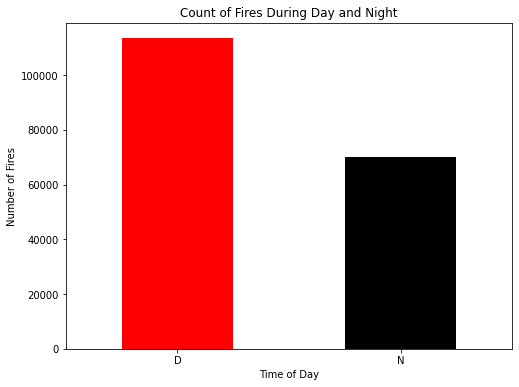

In [10]:

plt.figure(figsize=(8, 6))
day_night.plot(kind='bar', color=['red', 'black'])
plt.title('Count of Fires During Day and Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Fires')
plt.xticks(rotation=0)
plt.show()


# Result
* The data shows that a higher percentage of fires occur during the day (61.80%) than at night (38.19%). This suggests that human activities may play a role in fire occurrences, as people are more likely to be using tools and equipment that could spark fires during the day.

# Refrence
* Human-caused wildfires in Australia: https://www.environment.gov.au/resource/wildfires/human-cause

# Geographical Distribution:

Plot: Scatter plot of latitude vs longitude, color-coded by the number of fires in each region. This could help identify regions with a higher frequency of fires.

In [11]:
import pandas as pd
import plotly.express as px

# Assuming 'brightness', 'longitude', 'latitude', and 'acq_date' are columns in your DataFrame
# If not, replace them with the correct column names

# Convert 'acq_date' to string
df['acq_date_str'] = df['acq_date'].astype(str)

# Sorting DataFrame by 'acq_date'
df1 = df.sort_values(by='acq_date', ascending=True)

# Creating the animated density map
fig = px.density_mapbox(
    df1,
    lon='longitude',
    lat='latitude',
    z='brightness',
    radius=8,
    center=dict(lon=134, lat=-25),
    zoom=2.4,
    mapbox_style='carto-positron',
    color_continuous_scale='reds',
    animation_frame='acq_date_str',  # Use the string version
    labels={"acq_date_str": "Date"}
)

# Updating layout
fig.update_layout(
    title='Australian Fires: From 2019/10/01 to 2020/01/11',
    title_font=dict(size=18, color='FireBrick'),
    title_x=0.5
)

# Show the figure
fig.show()


# Result and analysis
* Regions with a higher frequency of wildfires in Australia: Southeast Australia, Northeast Australia, and Southwest Australia.

* Regions with a lower frequency of wildfires in Australia: Northern Territory and Central Australia.

* Factors that drive the geographical distribution of wildfires in Australia: Climate, vegetation, land use, and topography.

* Types of vegetation or land use patterns that increase wildfire risk: Eucalypt forests, dry grasslands and savannas, cleared or fragmented forests, and areas with a history of fire.

The data shows the locations(lat long) and density(number of cases) of the australia bushfires as seen from satellite images